### 1. Carga de librerías

In [1]:
# Carga de liberías

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funciones import cargar_muestras_paciente, explorar_directorio
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 2. Lectura y acondicionamiento de archivos

In [2]:
# Lectura de índices de archivos

df_indices= pd.read_csv(("Archivos Prueba Piloto TEST (ARCHIVOS ALT)/Balbuena1PRE.csv") , encoding='latin1')
indices = df_indices.columns
print(indices)

Index(['Identificación del Equipo', 'Dia del Análisis', 'Hora de Análisis',
       'N' de Rack', 'Posición del tubo', 'No de Muestra', 'Info de Muestra',
       'Modo de Análisis', 'ID del paciente', 'Ana. Info.',
       ...
       'Qflag(Linf. Atíp.?)', 'Qflag(NRBC?)', 'Qflag(Linf.An/Blas?)',
       'Qflag(Agluti. RBC?)', 'Qflag(Turb/HGB?)', 'Qflag(Déf. Hierro?)',
       'Qflag(Defecto HGB?)', 'Qflag(Fragmentos?)', 'Qflag(Agreg. PLT?)',
       'Qflag(PLT Grandes?)'],
      dtype='object', length=152)


In [3]:
# Creación de dataframes sangre prp_pre y prp_post 

df_sangre , df_prp_pre , df_prp_post = pd.DataFrame(columns = indices), pd.DataFrame(columns = indices), pd.DataFrame(columns = indices)

In [4]:
# Cargo los datos en los dataframes

directorio = 'Archivos Prueba Piloto TEST (ARCHIVOS ALT)'
lista_archivos = explorar_directorio(directorio)

#df = pd.read_csv(('/content/drive/My Drive/2024/PID/df_pacientes_copia.csv') , encoding='utf-8')

#df1 = pre; df2: prp1 (pre-frio) ; df3: prp2 (post-frio)
cargar_muestras_paciente(df_sangre, df_prp_pre, df_prp_post, directorio)
#df_sangre.head()

In [5]:
# Creación de factores de agrupamiento (etiquetas de salida) para cada dataframe

df_prp_pre_factores = pd.DataFrame()
df_prp_post_factores = pd.DataFrame()
df_sangre_factores = pd.DataFrame()

# Factor 2
df_prp_pre_factores['factor2'] = df_prp_pre.index.str[:3]
df_prp_post_factores['factor2'] = df_prp_post.index.str[:3]
df_sangre_factores['factor2'] = df_sangre.index.str[:3]
# Factor 1
df_prp_pre_factores['factor1'] = "pre_ref"
df_prp_post_factores['factor1'] = "post_ref"
df_sangre_factores['factor1'] = "sangre"
# Factor 3
df_prp_pre_factores['factor3'] = df_prp_pre.index.str.split().str[-1].map({'23/11/2023': 1, '07/12/2023': 2, '21/12/2023': 3})
df_prp_post_factores['factor3'] = df_prp_post.index.str.split().str[-1].map({'23/11/2023': 1, '07/12/2023': 2, '21/12/2023': 3})
df_sangre_factores['factor3'] = df_sangre.index.str.split().str[-1].map({'23/11/2023': 1, '07/12/2023': 2, '21/12/2023': 3})
# Factor 4
df_prp_pre_factores['factor4'] = df_prp_pre_factores['factor1'] + '_' + df_prp_pre_factores['factor2']
df_prp_post_factores['factor4'] = df_prp_post_factores['factor1'] + '_' + df_prp_post_factores['factor2']
df_sangre_factores['factor4'] = df_sangre_factores['factor1'] + '_' + df_sangre_factores['factor2']
# Factor 5
df_prp_pre_factores['factor5'] = df_prp_pre_factores['factor1'] + '_' + df_prp_pre_factores['factor3'].astype(str)
df_prp_post_factores['factor5'] = df_prp_post_factores['factor1'] + '_' + df_prp_post_factores['factor3'].astype(str)
df_sangre_factores['factor5'] = df_sangre_factores['factor1'] + '_' + df_sangre_factores['factor3'].astype(str)
# Factor 6
df_prp_pre_factores['factor6'] = df_prp_pre_factores['factor2'] + '_' + df_prp_pre_factores['factor3'].astype(str)
df_prp_post_factores['factor6'] = df_prp_post_factores['factor2'] + '_' + df_prp_post_factores['factor3'].astype(str)
df_sangre_factores['factor6'] = df_sangre_factores['factor2'] + '_' + df_sangre_factores['factor3'].astype(str)


In [6]:
# Combino muestras de PRP pre y post ya que son similares, a diferencia de sangre

df_pre_post = pd.concat([df_prp_pre,df_prp_post], ignore_index=True)
df_pre_post_factores = pd.concat([df_prp_pre_factores,df_prp_post_factores], ignore_index=True)

In [7]:
# Filtrado de columnas que no aportan información para el posterior análisis (en df_pre_post)

columnas_aelim = df_pre_post.select_dtypes(exclude=['number']).columns.tolist()
columnas_aelim += df_pre_post.columns[df_pre_post.isna().any()].tolist()
columnas_aelim.append("Posición del tubo")
columnas_aelim += [col for col in df_pre_post.columns if col.startswith("Mensaje de Acción")]
df_subset = df_pre_post[columnas_aelim]

df_pre_post_cleaned = df_pre_post.copy()
df_pre_post_cleaned.drop(columnas_aelim, axis=1, inplace=True)


indice_inic = df_pre_post_cleaned.columns.get_loc("WBC(10/uL)")
indice_fin = df_pre_post_cleaned.columns.get_loc("WBC-D(10/uL)")
df_pre_post_filtrado = df_pre_post_cleaned.iloc[:, indice_inic:indice_fin+1]

df_pre_post_filtrado.head()

,WBC(10/uL),RBC(10^4/uL),HGB(g/L),HCT(10^(-1)%),PLT(10^3/uL),PDW(10^(-1)fL),MPV(10^(-1)fL),P-LCR(10^(-1)%),PCT(10^(-2)%),WBC-C(10/uL),WBC-D(10/uL)
0,0,1,0,0,315,89,84,123,26,12,0
1,8,1,0,0,323,91,87,146,28,28,8
2,5,0,0,0,319,87,83,120,26,15,5
3,3,1,0,0,374,97,86,153,32,20,3
4,15,1,0,0,459,100,88,155,40,28,15


In [8]:
# Filtrado de columnas que no aportan información para el posterior análisis (en df_sangre)

columnas_aelim = df_sangre.select_dtypes(exclude=['number']).columns.tolist()
columnas_aelim += df_sangre.columns[df_sangre.isna().any()].tolist()
columnas_aelim.append("Posición del tubo")
columnas_aelim += [col for col in df_sangre.columns if col.startswith("Mensaje de Acción")]
df_subset = df_sangre[columnas_aelim]

df_sangre_cleaned = df_sangre.copy()
df_sangre_cleaned.drop(columnas_aelim, axis=1, inplace=True)


indice_inic = df_sangre_cleaned.columns.get_loc("WBC(10/uL)")
indice_fin = df_sangre_cleaned.columns.get_loc("WBC-D(10/uL)")
df_sangre_filtrado = df_sangre_cleaned.iloc[:, indice_inic:indice_fin+1]

df_sangre_filtrado.head()

,WBC(10/uL),RBC(10^4/uL),HGB(g/L),HCT(10^(-1)%),MCV(10^(-1)fL),MCH(10^(-1)pg),MCHC(g/L),PLT(10^3/uL),RDW-SD(10^(-1)fL),RDW-CV(10^(-1)%),...,IG#(10/uL%),IG%(10^(-1)%),NEUT#&(10/uL%),NEUT%&(10^(-1)%),LYMPH#&(10/uL),LYMPH%&(10^(-1)%),OTHER#(10/uL),OTHER%(10^(-1)%),WBC-C(10/uL),WBC-D(10/uL)
BAL 23/11/2023,569,397,117,356,897,295,329,226,455,142,...,1,2,437,768,93,163,0,0,564,569
BAL 07/12/2023,564,390,115,350,897,295,329,196,454,142,...,1,2,353,625,121,215,0,0,561,564
BAL 21/12/2023,730,390,115,351,900,295,328,220,445,139,...,2,3,506,692,129,177,0,0,736,730
COL 23/11/2023,820,501,157,449,896,313,350,226,435,136,...,0,0,564,688,160,195,1,1,809,820
COL 07/12/2023,642,513,161,457,891,314,352,246,430,134,...,0,0,396,617,180,280,0,0,639,642


In [9]:
# Por inspección, elimino columnas que no aportan información
df_pre_post_filtrado = df_pre_post_filtrado.drop(columns=['HGB(g/L)','HCT(10^(-1)%)'])
df_sangre_filtrado = df_sangre_filtrado.drop(columns=['OTHER#(10/uL)','OTHER%(10^(-1)%)'])

In [10]:
df_sangre_filtrado.columns

Index(['WBC(10/uL)', 'RBC(10^4/uL)', 'HGB(g/L)', 'HCT(10^(-1)%)',
       'MCV(10^(-1)fL)', 'MCH(10^(-1)pg)', 'MCHC(g/L)', 'PLT(10^3/uL)',
       'RDW-SD(10^(-1)fL)', 'RDW-CV(10^(-1)%)', 'PDW(10^(-1)fL)',
       'MPV(10^(-1)fL)', 'P-LCR(10^(-1)%)', 'PCT(10^(-2)%)', 'NEUT#(10/uL)',
       'LYMPH#(10/uL)', 'MONO#(10/uL)', 'EO#(10/uL)', 'BASO#(10/uL)',
       'NEUT%(10^(-1)%)', 'LYMPH%(10^(-1)%)', 'MONO%(10^(-1)%)',
       'EO%(10^(-1)%)', 'BASO%(10^(-1)%)', 'IG#(10/uL%)', 'IG%(10^(-1)%)',
       'NEUT#&(10/uL%)', 'NEUT%&(10^(-1)%)', 'LYMPH#&(10/uL)',
       'LYMPH%&(10^(-1)%)', 'WBC-C(10/uL)', 'WBC-D(10/uL)'],
      dtype='object')

### 3. Matrices de correlación

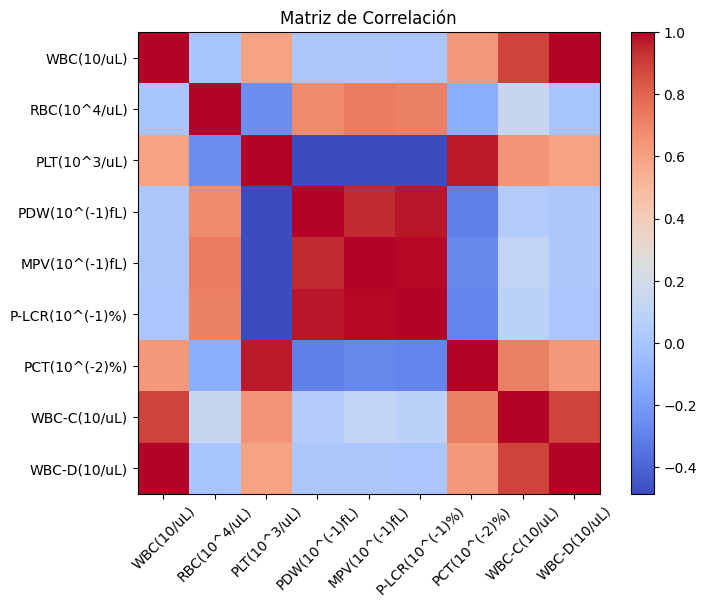

In [11]:
# Calcular la matriz de correlación de df_pre_post_filtrado

correlation_matrix = df_pre_post_filtrado.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Correlación')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

In [12]:
# Eliminar las variables altamente correlacionadas (mantener las de interés)

df_pre_post_filtrado.drop(columns = ['WBC-C(10/uL)','WBC-D(10/uL)','MPV(10^(-1)fL)', 'P-LCR(10^(-1)%)'], inplace=True)

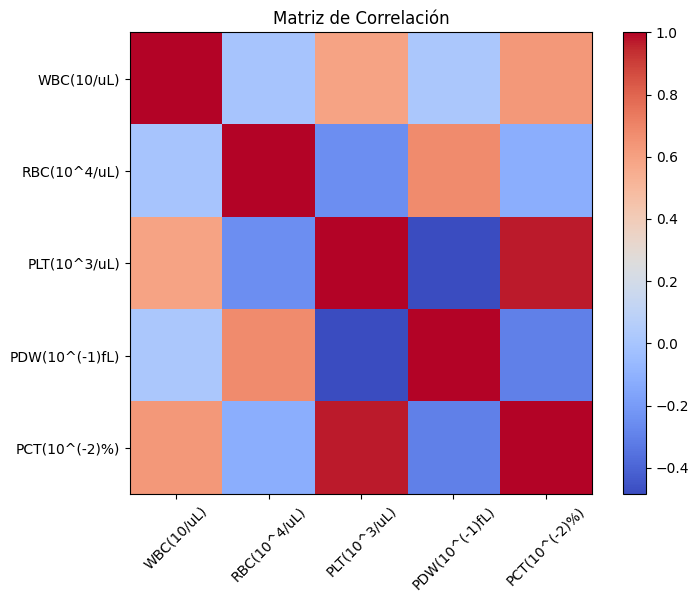

In [13]:
# Vuelvo a calcular la matriz de correlación de df_pre_post_filtrado

correlation_matrix = df_pre_post_filtrado.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Correlación')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

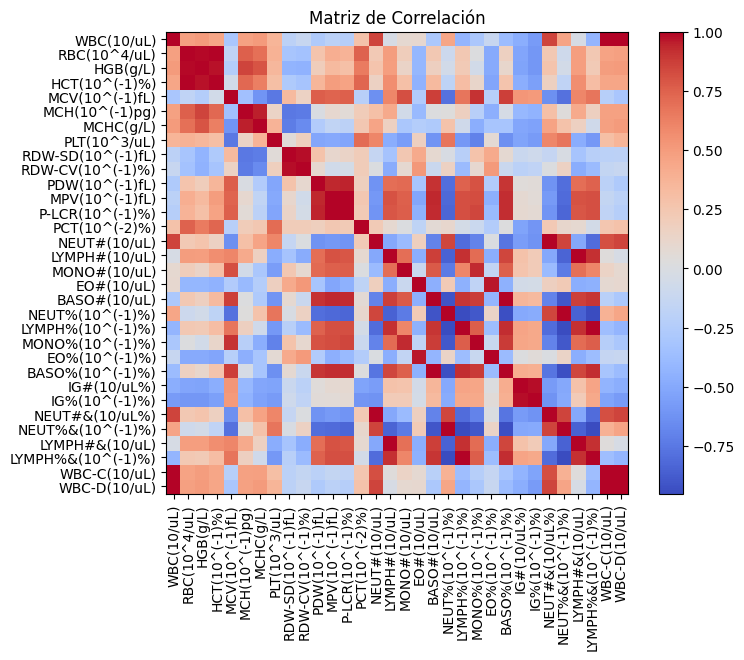

In [14]:
# Calcular la matriz de correlación de df_sangre_filtrado

correlation_matrix = df_sangre_filtrado.corr()

column_labels = correlation_matrix.columns

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Correlación')
# Rotar las etiquetas del eje x verticalmente
plt.xticks(range(len(correlation_matrix)), column_labels, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

In [15]:
# Eliminar las variables altamente correlacionadas (mantener las de interés)

df_sangre_filtrado = df_sangre_filtrado[['WBC(10/uL)', 'RBC(10^4/uL)','PLT(10^3/uL)','MCV(10^(-1)fL)', 'MCH(10^(-1)pg)','RDW-CV(10^(-1)%)','PDW(10^(-1)fL)',
       'PCT(10^(-2)%)','NEUT#(10/uL)','LYMPH#(10/uL)', 'MONO#(10/uL)', 'EO#(10/uL)', 'BASO#(10/uL)' ,'IG#(10/uL%)']]

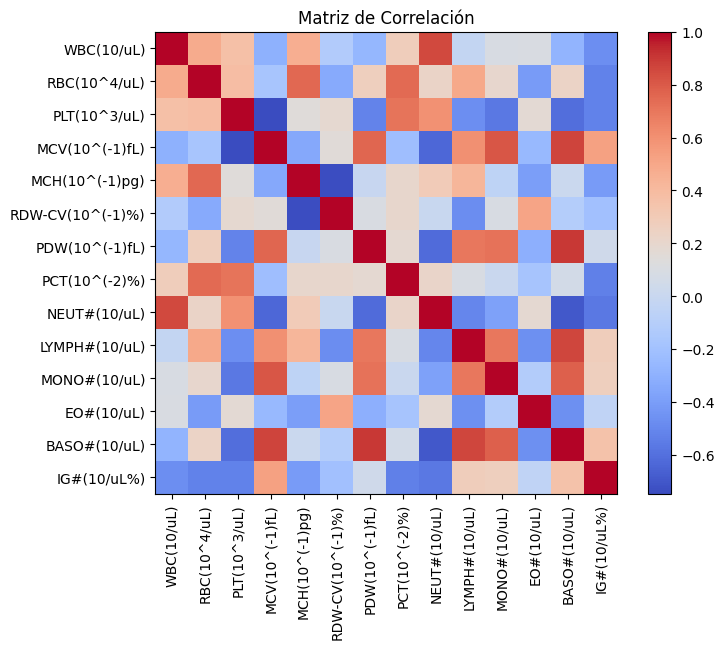

In [16]:
# Vuelvo a calcular la matriz de correlación de df_sangre_filtrado

correlation_matrix = df_sangre_filtrado.corr()

column_labels = correlation_matrix.columns

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Correlación')
# Rotar las etiquetas del eje x verticalmente
plt.xticks(range(len(correlation_matrix)), column_labels, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

### 4. Biplots y Otras Gráficas finales

In [17]:
# El Biplot es un gráfico que comprende un PCA + la graficación de vectores de carga. Los vectores de carga grafican el grado de influencia
# de las variables originales mas preponderantes en las componentes principales del PCA.

In [18]:
# Escalado de datos

scaler1 = StandardScaler()
scaler2 = StandardScaler()

scaler1.fit(df_pre_post_filtrado)
scaler2.fit(df_sangre_filtrado)

df_pre_post_escalado = scaler1.transform(df_pre_post_filtrado)
df_sangre_escalado = scaler2.transform(df_sangre_filtrado)


In [19]:
# Biplot de PRP


In [20]:
# PCA de PRP

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_pre_post_escalado)
 
# Coeficientes de correlacion de los componentes principales
loadings = pca.components_
 
# Numero de variables antes del PCA
n_features = pca.n_features_in_
 
# Nombres de las variables
feature_names = df_pre_post_filtrado.columns
 

pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
WBC(10/uL),-0.396075,-0.436868
RBC(10^4/uL),0.262699,-0.632489
PLT(10^3/uL),-0.583312,-0.109589
PDW(10^(-1)fL),0.359048,-0.579154
PCT(10^(-2)%),-0.552219,-0.248346


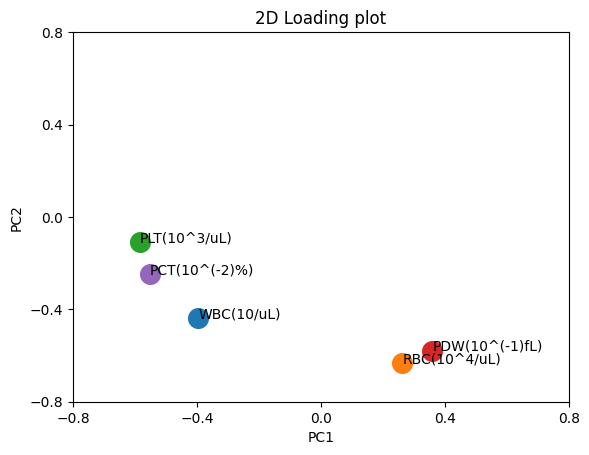

In [21]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

In [22]:
# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

# Map
target_names = {
    'BAL':1,
    'COL':2, 
    'FOL':3,
    'MON':4
}

pca_df['Participante'] = df_pre_post_factores["factor2"]
pca_df['Participante'] = pca_df['Participante'].map(target_names)

# Scale PCS into a DataFrame
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
pca_df_scaled

,PC1,PC2,Participante
0,0.007585,0.229792,1
1,-0.044231,0.135042,1
2,-0.100614,0.514349,1
3,-0.086348,0.071865,2
4,-0.277923,-0.125876,2
5,-0.357519,-0.392784,2
6,0.040653,-0.054183,3
7,0.227731,-0.003584,3
8,0.112263,0.484884,3
9,-0.012413,0.016378,4


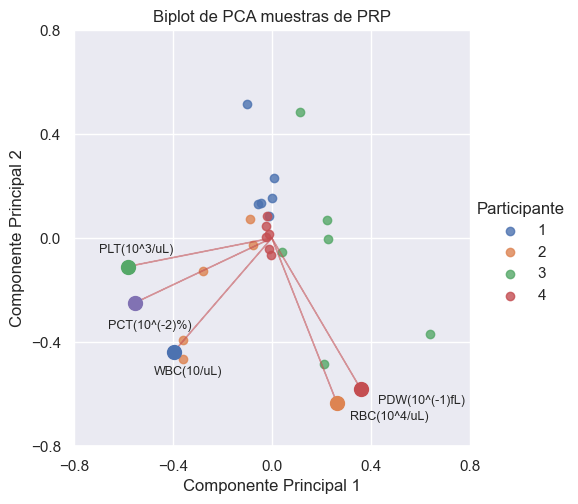

In [23]:
# 2D
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Define listas de desplazamiento específicas para cada texto en x e y
desplazamiento_x = [1.2, 1.2, 1.2, 1.2, 1.2] 
desplazamiento_y = [1.2, 1.1, 0.5, 1.1, 1.4]

# Asigna el color según la columna "target"
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    hue='Participante',  # Añade esta línea para asignar el color según la columna "target"
    legend=True
)

# Dibuja los loadings con sus nombres y ajusta el tamaño de los puntos de los load vectors
for i, varnames in enumerate(feature_names):
    plt.arrow(
        0, 0, # coordenadas de la base de la flecha
        xs[i], # longitud de la flecha a lo largo de x
        ys[i], # longitud de la flecha a lo largo de y
        color='r', 
        head_width=0.01,
        alpha=0.5  # Establece la transparencia para los load vectors
    )
    plt.text(xs[i] * desplazamiento_x[i], ys[i] * desplazamiento_y[i], varnames, fontsize=9)  # Ajusta el desplazamiento multiplicando por 1.1 o cualquier otro factor

# Dibuja los puntos individuales y ajusta el tamaño de los puntos
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=100)  # Ajusta el tamaño de los puntos con el parámetro s

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('Biplot de PCA muestras de PRP')
plt.show()

In [24]:
# PCA solo de muestras de sangre sin los load vectors ya que son muchos

In [25]:
pca_sangre = PCA(n_components=2)
pca_sangre.fit(df_sangre_escalado)
X_pca_sangre = pca_sangre.transform(df_sangre_escalado)

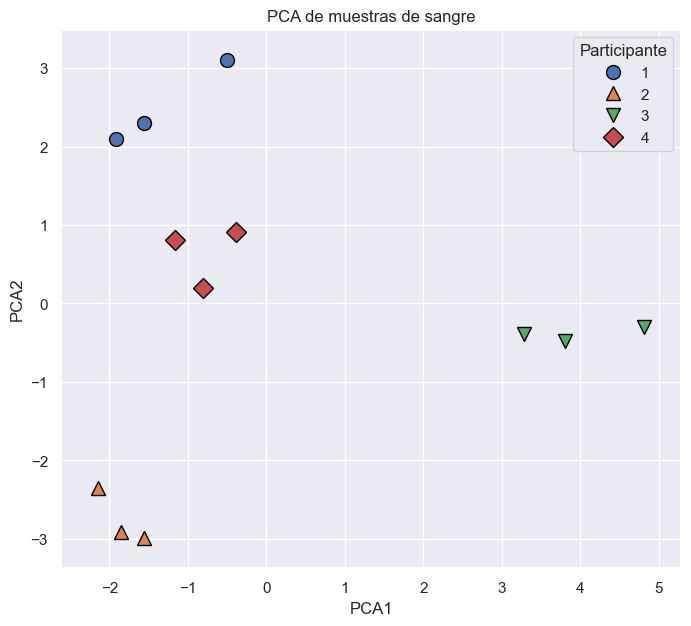

In [28]:
import mglearn
import matplotlib.pyplot as plt

pca_sangre = PCA(n_components=2)
pca_sangre.fit(df_sangre_escalado)
X_pca_sangre = pca_sangre.transform(df_sangre_escalado)

# Mapeo para anonimizacion 

# Map
target_names = {
    'BAL':1,
    'COL':2,
    'FOL':3,
    'MON':4,
}

mapeo = pd.DataFrame()
mapeo["factor2"] = df_sangre_factores["factor2"]
mapeo["factor2"] = mapeo["factor2"].map(target_names)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca_sangre[:, 0], X_pca_sangre[:, 1], mapeo["factor2"])
plt.legend(mapeo["factor2"].unique(), title="Participante", loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA de muestras de sangre")

plt.show()

### 4. Evolución de Womac

In [29]:
data_womac = {
    'participante': [1, 2, 3, 4],
    'w1': [43, 13, 34, 78],
    'w2': [34, 5, 22, 52],
    'w3': [81, 8, 24, 19],
    'w4': [86, 8, 25, 20],
    'grado_kl': [3, 2, 3, 4]
}

data_womac = pd.DataFrame(data_womac)

In [30]:
data_womac

,participante,w1,w2,w3,w4,grado_kl
0,1,43,34,81,86,3
1,2,13,5,8,8,2
2,3,34,22,24,25,3
3,4,78,52,19,20,4


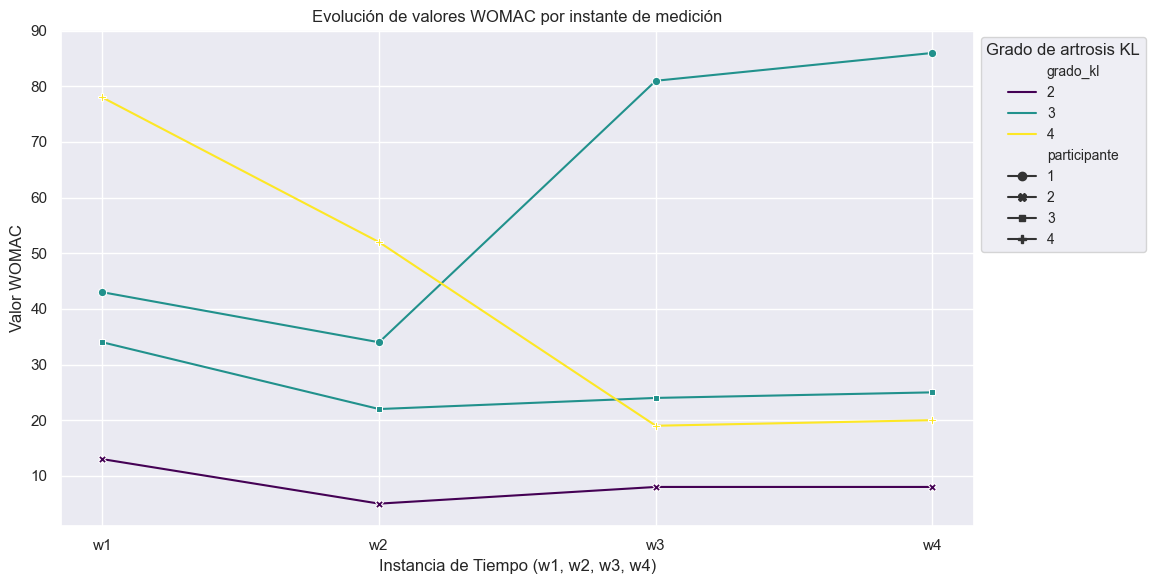

In [33]:
# Convertimos el DataFrame a formato largo
data_womac_long = data_womac.melt(id_vars=['participante', 'grado_kl'], var_name='instancia_tiempo', value_name='valor_womac')

# Convertimos 'instancia_tiempo' a tipo categórico para ordenar correctamente en el gráfico
data_womac_long['instancia_tiempo'] = pd.Categorical(data_womac_long['instancia_tiempo'], categories=['w1', 'w2', 'w3', 'w4'], ordered=True)

# Graficamos usando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_womac_long, x='instancia_tiempo', y='valor_womac', hue='grado_kl', style='participante', markers=True, dashes=False, palette='viridis')
plt.xlabel('Instancia de Tiempo (w1, w2, w3, w4)')
plt.ylabel('Valor WOMAC')
plt.title('Evolución de valores WOMAC por instante de medición')
plt.legend(title='Grado de artrosis KL', fontsize='small')
plt.tight_layout()

# Ajustamos los títulos de las leyendas
ax.get_legend().set_title('Grado de artrosis KL')
ax.get_legend().set_bbox_to_anchor((1, 1))  # Ajusta la posición de la leyenda
ax.get_legend().set_title('Grado de artrosis KL', prop={'size': 'medium'})  # Tamaño del título

plt.show()